# Laboratorio 2 - Formulación de problemas

## Punto 1

Para una propuesta de investigación se desean contratar estudiantes de doctorado
y maestría. Hay 3 actividades principales, que deben cumplirse, la programació, redacción y
divulgación. Los estudiantes de doctorado dedican 2 horas a la programación, 7 a la redacción
y 1 a la divulgación, y los estudiantes de maestría 4 horas a la programación, 2 redacción y 1
a la divulgación. Si la propuesta se debe satisfacer un mínimo de 16 horas de programación, 5
de divulgación y 20 de redacción. Cuantos estudiantes se necesitan en el proyecto con tal de
reducir al máximo los gastos, si la hora de un estudiante de maestría vale 50 y la de doctorado
100.

### Planteamiento

Hay dos categorías: doctorado y maestría.
$$
h =
\begin{bmatrix}
   programming \\
   writing \\
   divulgation
\end{bmatrix}
\\
doctor = 
\begin{bmatrix}
   2 \\
   7 \\
   1
\end{bmatrix}
master = 
\begin{bmatrix}
   4 \\
   2 \\
   1
\end{bmatrix}
\\
$$

Se proponen las siguiente forma de solución:
$$
x = 
\begin{bmatrix}
   n_{doctor} \\
   n_{master}
\end{bmatrix}
$$

Posibles soluciones:
$$
x_a = 
\begin{bmatrix}
   2 \\
   4
\end{bmatrix}
\\
x_b = 
\begin{bmatrix}
   3 \\
   3
\end{bmatrix}
$$

La función de costo se compondría:
$$
\begin{gather}
f(x) = x_1(100)(2 + 7 + 1) + x_2(50)(4 + 2 + 1) \\
\boxed{f(x) = 1000 x_1 + 350 x_2}
\end{gather}
$$

Como vamos a minimizar la función, entonces denotamos:
$$
\begin{matrix}
minimize & -f(x) = -1000 x_1 - 350 x_2
\end{matrix}
$$

Las restricciones serían:
$$
\begin{gather}
g(x) = 2 x_1 + 4 x_2 \geqslant 16 \\
j(x) = 7 x_1 + 2 x_2 \geqslant 20 \\
k(x) = x_1 + x_2 \geqslant 5
\end{gather}
$$

### Implementación

In [1]:
!pip install matplotlib
!pip install numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Conjunto factible

Implementamos las restricciones en el caso donde son iguales al valor propuesto como restricción, y construímos funciones lineales en términos de $x_2$ que producen $x_1$.

In [3]:
def g_constraint(x_2):
    return 8 - 2 * x_2

def j_constraint(x_2):
    return (20 - 2 * x_2) / 7.0

def k_constraint(x_2):
    return 5 - x_2

Graficamos las diferentes restricciones del problema.

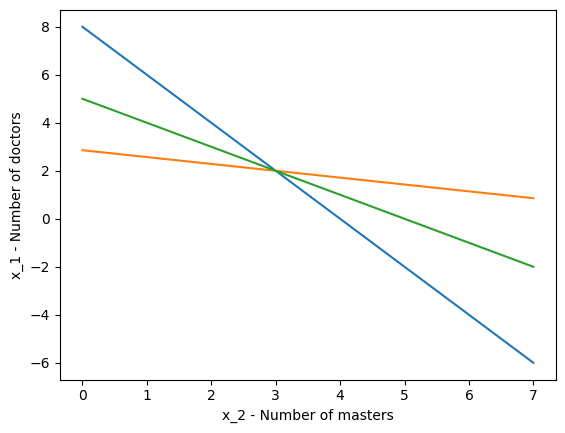

In [4]:
domain = np.array(range(8))

g_range = []
j_range = []
k_range = []
for i in domain:
    g_range.append(g_constraint(i))
    j_range.append(j_constraint(i))
    k_range.append(k_constraint(i))

plt.plot(domain, g_range)
plt.plot(domain, j_range)
plt.plot(domain, k_range)
plt.xlabel("x_2 - Number of masters")
plt.ylabel("x_1 - Number of doctors")
plt.show()

Transformamos la función de costo para obtener líneas de contorno, observando cómo se acerca la función al conjunto factible.
$$
\begin{gather}
-f(x) = -1000 x_1 - 350 x_2 \\
1000 x_1 = f(x) - 350 x_2 \\
x_1 = \frac{f(x) - 350 x_2}{1000}
\end{gather}
$$

In [5]:
def cost_func(x_1, x_2):
    return - (1000 * x_1) - (350 * x_2)

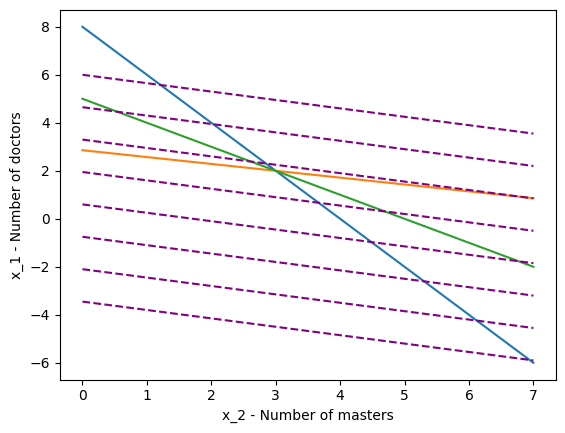

In [6]:
level_lines = np.empty((8, 8))
costs = []
for x1 in range(-6, 2):
    costs.append(cost_func(x1, domain[x1 + 6]))

plt.plot(domain, g_range)
plt.plot(domain, j_range)
plt.plot(domain, k_range)
for level in range(level_lines.shape[1]):
    for v in range(level_lines.shape[0]):
        level_lines[v, level] = (costs[level] - 350 * domain[v]) / 1000.0
    plt.plot(domain, level_lines[:, level], color = "purple", linestyle = "dashed")

plt.xlabel("x_2 - Number of masters")
plt.ylabel("x_1 - Number of doctors")
plt.show()

Observamos que las líneas de las restricciones para el conjunto factible coinciden en un punto. Extraemos $x_1$ y hacemos sustitución:
$$
k(x) = x_1 + x_2 = 5 \rightarrow x_1 = 5 - x_2 \\
$$

Usamos $j(x)$.
$$
\begin{gather}
j(x) = 7 x_1 + 2 x_2 = 20 \\
7 (5 - x_2) + 2 x_2 = 20 \\
35 - 7 x_2 + 2 x_2 = 20 \\
x_2 = 3
\end{gather}
$$

La restricción $k(x)$ y $j(x)$ coinciden en el punto $x = \begin{bmatrix} 2 \\ 3\end{bmatrix}$. Si coincide con $g(x)$ tenemos un único punto de intersección.
$$
\begin{gather}
g(x) = x_1 + 2 x_2 = 8 \\
(5 - x_2) + 2 x_2 = 8 \\
5 + x_2 = 8 \\
x_2 = 3
\end{gather}
$$

Como $g(x)$, $j(x)$ y $k(x)$ coinciden en el mismo punto $x = \begin{bmatrix} 2 \\ 3\end{bmatrix}$, tenemos que el conjunto factible es:
$$
x\in \mathbb{N} |\ x_1 = 2 \wedge x_2 = 3
$$

### Óptimo

El óptimo para minimizar $-f(x)$ es $x = \begin{bmatrix} 2 \\ 3\end{bmatrix}$, es decir, contratar 2 estudiantes de doctorado y 3 de maestría.

In [7]:
-cost_func(2, 3)

3050

El costo por su contrato sería de $3050$

## Punto 2

Se quiere diseñar una caja de profundidad $z$ ancho $x$ y alto $y$ sin cubierta. El esto
de las paredes de longitud $z$ cuestan $\$10/m^2$ , el costo de las paredes de longitud $x$ cuestan $\$20/m^2$, el costo del fondo $zx$ cuesta $\$10/m^2$, el costo de cada viaje de ida cuesta $\$5$, el costo de cada viaje de vuelta cuesta $\$5$. Se quiere calcular la dimensión de la caja para minimizar el costo de transportar $400m^3$ de arena de un punto $a$ un punto $b$.

![box-model](../resources/images/lab2/box-model-point2.png)

Definimos que nuestras variables van a ser:
$$
\begin{bmatrix}
width \\
high \\
depth \\
travels
\end{bmatrix} = 
\begin{bmatrix}
x \\
y \\
z \\
e
\end{bmatrix}
$$

Siendo la función de costo:
$$
\begin{gather}
f(x, y, z, e) = 2(10zy) + 2(20xy) + 10zx + 10e - 5 \\
f(x, y, z, e) = 20zy + 40xy + 10zx + 10e - 5 \\
\boxed{f(x, y, z, e) = 5(4zy + 8xy + 2zx + 2e - 1)}
\end{gather}
$$

El problema se pueda expresar como:
$$
\begin{matrix}
minimize & -f(x, y, z, e) = -5(4zy + 8xy + 2zx + 2e - 1) \\
\begin{bmatrix}
x \\
y \\
z \\
e \\
\end{bmatrix} \in \mathbb{R}^4 & subject\ to\ 
\begin{gather}
x \geqslant 1 \\
y \geqslant 1 \\
z \geqslant 1 \\
e \geqslant 1 \\
xyz \geqslant 400
\end{gather}
\end{matrix}
$$

En este planteamiento, las cajas van cargadas con arena y vuelven vacías. Al final, en el último viaje las cajas llevan la arena pero no vuelven.

## Punto 3

Una empresa está planificando la creación de un nuevo producto utilizando tres tipos de materiales: $A,\ B\ y\ C$. La empresa desea determinar la cantidad de cada material que debe utilizar para maximizar las ganancias, pero debe respetar ciertas limitaciones en cuanto a la disponibilidad de estos recursos.

La empresa ha determinado que, en total, no puede usar más de $100$ unidades combinadas de los tres materiales. Además, se requiere que se utilice un mı́nimo de $20$ unidades del material $A$, para asegurar la calidad del producto. Por otro lado, la combinación de los materiales $B$ y $C$ debe ser al menos suficiente para cumplir con los estándares de producción, es decir, deben
sumar al menos $50$ unidades.

La empresa también sabe que el costo de cada material es menor que su valor de venta. El material $A$ tiene un costo de $40$ por unidad y se puede vender por $50$; el material $B$ cuesta $45$ por unidad y se puede vender por $60$; y el material $C$ tiene un costo de $60$ por unidad y se puede vender por $80$. 

El objetivo de la empresa es maximizar las ganancias, que dependen de la diferencia entre el costo y el precio de venta de cada material. ¿Cuántas unidades de cada material debe usar la empresa para obtener la máxima ganancia posible, respetando las restricciones mencionadas?

### Formulación

Definimos que nuestras soluciones van a tener la forma:
$$ units\ of\ materials: x = 
\begin{bmatrix}
A \\
B \\
C 
\end{bmatrix}
$$

La formulación para la función de costo sería:
$$
\begin{gather}
f(x) = Profit_A + Profit_B + Profit_C \\
f(x) = (50x_1 - 40x_1) + (60x_2 - 45x_2) + (80x_3 - 60x_3) \\
f(x) = 10x_1 + 15x_2 + 20x_3 \\
\boxed{f(x) = 5(2x_1 + 3x_2 + 4x_3)}
\end{gather}
$$

Las restricciones para el conjunto factible quedarían:
$$
\begin{gather}
g(x) = x_1 + x_2 + x_3 \leqslant 100 \\
h(x) = x_1 \geqslant 20 \\
k(x) = x_2 + x_3 \geqslant 50
\end{gather}
$$

Finalmente, la formulación para optimizar quedaría:
$$
\begin{matrix}
minimize & -f(x) = -5(2x_1 + 3x_2 + 4x_3) \\
x \in \mathbb{N}^3 & subject\ to\ 
\begin{gather}
g(x) = x_1 + x_2 + x_3 \leqslant 100 \\
h(x) = x_1 \geqslant 20 \\
k(x) = x_2 + x_3 \geqslant 50
\end{gather}
\end{matrix}
$$